In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1
Diberikan citra girl-warna.bmp, Tampilkan hasil transformasi citra tersebut ke model warna:
a. YCbCr
b. HSI
c. YIQ
d. YUV

In [ ]:
#YCbCr
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/girl-warna.bmp", cv.IMREAD_COLOR)

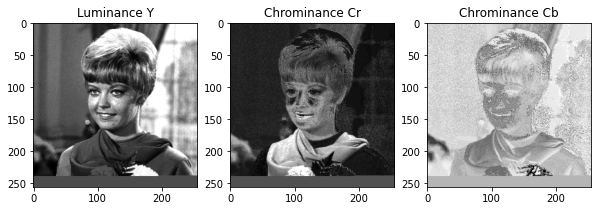

In [ ]:
transcol=cv.cvtColor(img1, cv.COLOR_BGR2YCR_CB) #bgr ke ycbcr
plt.figure(figsize=(10,10))

plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')

plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('Chrominance Cr')

plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('Chrominance Cb')

plt.show()

In [ ]:
#HSV/HSI
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/girl-warna.bmp", cv.IMREAD_COLOR)

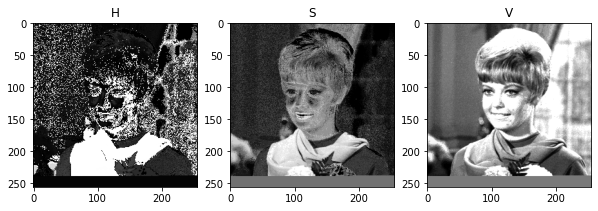

In [ ]:
transcol=cv.cvtColor(img1, cv.COLOR_BGR2HSV) 
plt.figure(figsize=(10,10))

plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('H')

plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('S')

plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('V')

plt.show()

In [ ]:
#YIQ
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import color
img1 = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/girl-warna.bmp", cv.IMREAD_COLOR)

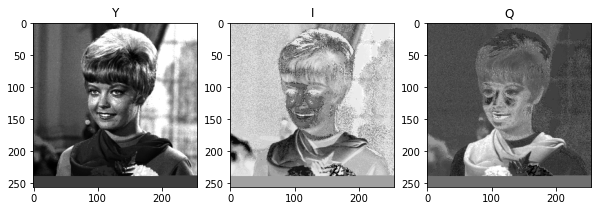

In [ ]:
img2 = color.rgb2yiq(img1)
plt.figure(figsize=(10,10))

plt.subplot(2,3,4)
plt.imshow(img2[:,:,0],cmap="gray")
plt.title('Y')

plt.subplot(2,3,5)
plt.imshow(img2[:,:,1],cmap="gray")
plt.title('I')

plt.subplot(2,3,6)
plt.imshow(img2[:,:,2],cmap="gray")
plt.title('Q')

plt.show()

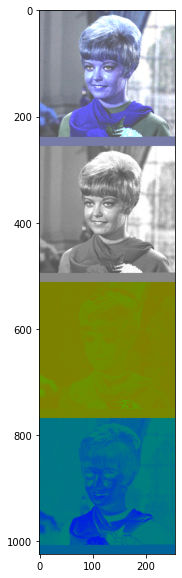

In [ ]:
# YUV
import cv2 as cv
import numpy as np

def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/girl-warna.bmp')
imgYuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
y, u, v = cv.split(imgYuv)

lut_u, lut_v = make_lut_u(), make_lut_v()

# konversi ke bgr kembali agar dapat lut dan stack imgnya
y = cv.cvtColor(y, cv.COLOR_GRAY2BGR)
u = cv.cvtColor(u, cv.COLOR_GRAY2BGR)
v = cv.cvtColor(v, cv.COLOR_GRAY2BGR)

u_map = cv.LUT(u, lut_u)
v_map = cv.LUT(v, lut_v)
result = np.vstack([img, y, u_map, v_map])

plt.figure(figsize=(10,10))
plt.imshow(result)

#2
Tentukan nilai threshold dengan metode otsu dari citra montain.bmp dan tampilkan hasil threshold-
nya.

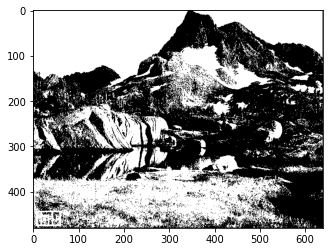

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv		
import numpy as np	

image1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/mountain.bmp')
img = cv.cvtColor(image1, cv.COLOR_BGR2GRAY) #konversi ke gray

# otsu treshold disini
ret, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY +	cv.THRESH_OTSU)	

plt.imshow(thresh1,cmap="gray")	

#3
Dengan menggunakan segmentasi dan proses citra biner, proses citra coints.png sehingga seluruh
background menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra
tersebut.

In [96]:
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/coints.png',cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'output')

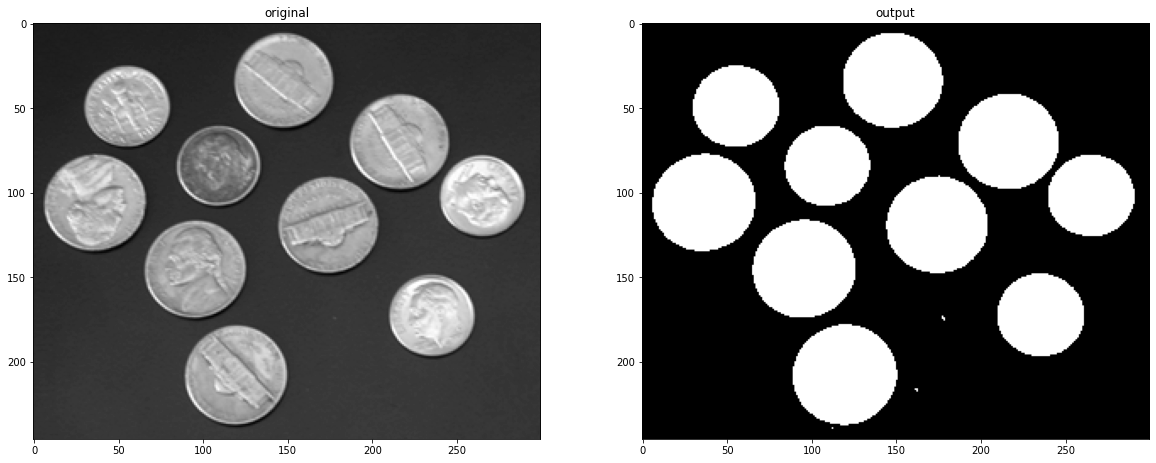

In [125]:
img1 = cv.threshold(img, 79, 255, cv.THRESH_BINARY)[1]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(img1, cmap ='gray')
plt.title('output')

#4
Segmentasi citra peppers.tiff menggunakan K-Mean dengan nilai K = 3 berdasarkan warna.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 3/peppers.tiff")
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)
vectorized = img1.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 3 #nilai k=3
attempts=10
ret,label,center=cv.kmeans(vectorized,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)

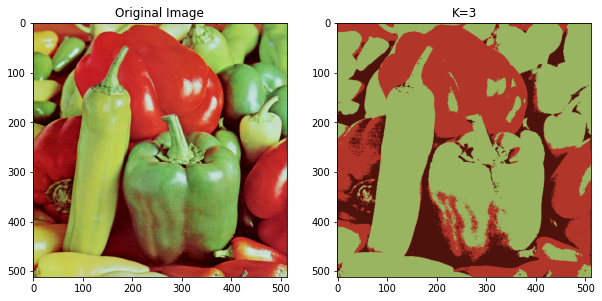

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img1.shape))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img1)
plt.title('Original Image')

plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('K=3')
plt.show()